In [249]:
import librosa
import librosa.display

file = 'cat.wav'
data, sample_rate = librosa.load(file)
print(data)
print(sample_rate)

[-0.00375907 -0.00616728 -0.00355973 ...  0.01311207  0.0093008
  0.        ]
22050


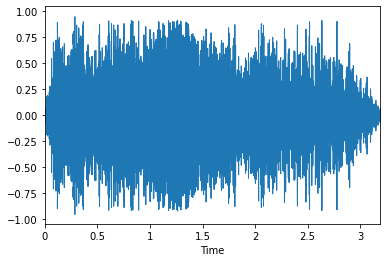

In [250]:
#Dog Sound
import IPython.display as ipd

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(file)

In [251]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(file)

In [252]:
wave_sample_rate

44100

In [253]:
wave_audio

array([[-142, -142],
       [-211, -210],
       [-181, -182],
       ...,
       [ 305,  305],
       [ 196,  196],
       [  82,   82]], dtype=int16)

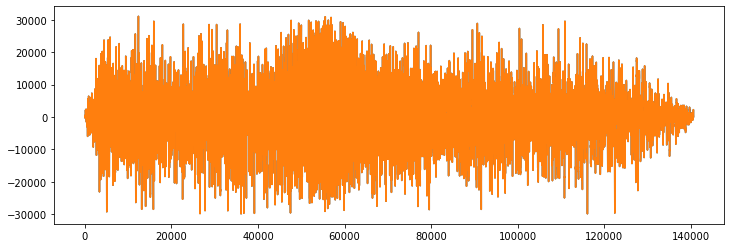

In [254]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [255]:
data

array([-0.00375907, -0.00616728, -0.00355973, ...,  0.01311207,
        0.0093008 ,  0.        ], dtype=float32)

In [256]:
import pandas as pd
from pathlib import Path
import numpy as np

audio_dataset_path = './UrbanSound8K/audio/'
metadata = './UrbanSound8K/metadata/UrbanSound8K.csv'
metadata = pd.read_csv(metadata)
metadata.shape

(8712, 8)

In [257]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc (y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [259]:
from tqdm import tqdm
import os

extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3534it [05:05, 11.13it/s]/home/amiya/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8304it [11:38, 14.79it/s]/home/amiya/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8307it [11:38, 17.89it/s]/home/amiya/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8712it [12:11, 11.90it/s]


In [260]:
print(data)
#print(len(extracted_features[0]))

[-3.1593384e+02  9.5675888e+01 -3.8047771e+01  4.7500740e+01
 -7.3586011e+00  1.0455470e+01 -1.8447603e+00  1.8642927e+01
 -1.1789134e+01  7.2919984e+00 -7.3276439e+00  1.0661768e+01
 -1.4730461e+01  2.3039916e+00 -1.0813205e+01  5.0486927e+00
 -4.1896582e+00  1.9373505e+01  9.9117869e-01  4.5830026e+00
 -1.0203203e+01  1.4952719e+00 -8.8648930e+00  7.1252317e+00
  2.8728654e+00  1.5023614e+00 -1.3836695e+01  3.0785382e-01
  4.4619193e+00  2.4852617e+00 -1.1666129e+01 -3.5005755e+00
  4.0923743e+00  8.7135019e+00  1.1072227e+00  3.0423386e+00
  2.5794456e+00  5.7758051e-01 -1.1463765e+01 -5.9653535e+00]


In [261]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()
#print(extracted_features_df)

,feature,class
0,"[-349.56076, 106.93007, -72.73932, -37.161476,...",dog_bark
1,"[-339.69455, 112.55796, -75.99465, -40.204727,...",dog_bark
2,"[-58.007244, 84.2322, -53.017014, 49.84611, -4...",air_conditioner
3,"[-54.992184, 85.74824, -53.189156, 50.392918, ...",air_conditioner
4,"[-46.558163, 81.02452, -48.394222, 49.413486, ...",air_conditioner


In [262]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [263]:
X.shape
#y.shape

(8712, 40)

In [264]:
y

array(['dog_bark', 'dog_bark', 'air_conditioner', ..., 'car_horn',
       'car_horn', 'car_horn'], dtype='<U16')

In [265]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [266]:
y.shape

(8712, 10)

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =0)

In [268]:
y_train.shape

(6969, 10)

In [269]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [270]:
num_labels = y.shape[1]
num_labels

10

In [271]:
model = Sequential()
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_12 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_13 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
__________

In [272]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [273]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=200
num_batch_size=32

checkpoint = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                           verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size = num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), callbacks=[checkpoint])

duration = datetime.now()-start
print("Training completed in time: ", duration)

Train on 6969 samples, validate on 1743 samples
Epoch 1/200
6752/6969 [============================>.] - ETA: 0s - loss: 12.3088 - acc: 0.1323
Epoch 00001: val_loss improved from inf to 3.69866, saving model to saved_models/audio_classification.hdf5
6969/6969 [==============================] - 1s 144us/sample - loss: 12.2525 - acc: 0.1327 - val_loss: 3.6987 - val_acc: 0.2243
Epoch 2/200
6592/6969 [===========================>..] - ETA: 0s - loss: 5.2385 - acc: 0.1644
Epoch 00002: val_loss improved from 3.69866 to 2.28104, saving model to saved_models/audio_classification.hdf5
6969/6969 [==============================] - 0s 63us/sample - loss: 5.0978 - acc: 0.1636 - val_loss: 2.2810 - val_acc: 0.1102
Epoch 3/200
6592/6969 [===========================>..] - ETA: 0s - loss: 2.3794 - acc: 0.1467
Epoch 00003: val_loss improved from 2.28104 to 2.26575, saving model to saved_models/audio_classification.hdf5
6969/6969 [==============================] - 0s 63us/sample - loss: 2.3751 - acc: 0.14

Epoch 26/200
6592/6969 [===========================>..] - ETA: 0s - loss: 1.3482 - acc: 0.5361
Epoch 00026: val_loss improved from 1.15536 to 1.15060, saving model to saved_models/audio_classification.hdf5
6969/6969 [==============================] - 0s 62us/sample - loss: 1.3519 - acc: 0.5362 - val_loss: 1.1506 - val_acc: 0.6363
Epoch 27/200
6720/6969 [===========================>..] - ETA: 0s - loss: 1.3502 - acc: 0.5382
Epoch 00027: val_loss improved from 1.15060 to 1.11463, saving model to saved_models/audio_classification.hdf5
6969/6969 [==============================] - 0s 62us/sample - loss: 1.3455 - acc: 0.5405 - val_loss: 1.1146 - val_acc: 0.6460
Epoch 28/200
6304/6969 [==========================>...] - ETA: 0s - loss: 1.3165 - acc: 0.5482
Epoch 00028: val_loss improved from 1.11463 to 1.09307, saving model to saved_models/audio_classification.hdf5
6969/6969 [==============================] - 0s 65us/sample - loss: 1.3217 - acc: 0.5481 - val_loss: 1.0931 - val_acc: 0.6483
Epoc

Epoch 53/200
6368/6969 [==========================>...] - ETA: 0s - loss: 1.1001 - acc: 0.6215
Epoch 00053: val_loss did not improve from 0.88614
6969/6969 [==============================] - 0s 62us/sample - loss: 1.1046 - acc: 0.6183 - val_loss: 0.9013 - val_acc: 0.7114
Epoch 54/200
6624/6969 [===========================>..] - ETA: 0s - loss: 1.0809 - acc: 0.6271
Epoch 00054: val_loss improved from 0.88614 to 0.86570, saving model to saved_models/audio_classification.hdf5
6969/6969 [==============================] - 0s 62us/sample - loss: 1.0754 - acc: 0.6302 - val_loss: 0.8657 - val_acc: 0.7194
Epoch 55/200
6656/6969 [===========================>..] - ETA: 0s - loss: 1.0930 - acc: 0.6221
Epoch 00055: val_loss improved from 0.86570 to 0.85515, saving model to saved_models/audio_classification.hdf5
6969/6969 [==============================] - 0s 62us/sample - loss: 1.0936 - acc: 0.6215 - val_loss: 0.8551 - val_acc: 0.7177
Epoch 56/200
6560/6969 [===========================>..] - ETA: 0

Epoch 81/200
6624/6969 [===========================>..] - ETA: 0s - loss: 0.9871 - acc: 0.6609
Epoch 00081: val_loss did not improve from 0.75892
6969/6969 [==============================] - 0s 60us/sample - loss: 0.9794 - acc: 0.6621 - val_loss: 0.7738 - val_acc: 0.7516
Epoch 82/200
6240/6969 [=========================>....] - ETA: 0s - loss: 0.9947 - acc: 0.6641
Epoch 00082: val_loss did not improve from 0.75892
6969/6969 [==============================] - 0s 64us/sample - loss: 0.9907 - acc: 0.6628 - val_loss: 0.7639 - val_acc: 0.7481
Epoch 83/200
6816/6969 [============================>.] - ETA: 0s - loss: 0.9772 - acc: 0.6651
Epoch 00083: val_loss did not improve from 0.75892
6969/6969 [==============================] - 0s 66us/sample - loss: 0.9799 - acc: 0.6648 - val_loss: 0.7761 - val_acc: 0.7522
Epoch 84/200
6688/6969 [===========================>..] - ETA: 0s - loss: 0.9739 - acc: 0.6613
Epoch 00084: val_loss did not improve from 0.75892
6969/6969 [===========================

6496/6969 [==========================>...] - ETA: 0s - loss: 0.9285 - acc: 0.6892
Epoch 00110: val_loss did not improve from 0.71610
6969/6969 [==============================] - 0s 61us/sample - loss: 0.9268 - acc: 0.6893 - val_loss: 0.7463 - val_acc: 0.7636
Epoch 111/200
6560/6969 [===========================>..] - ETA: 0s - loss: 0.9276 - acc: 0.6867
Epoch 00111: val_loss did not improve from 0.71610
6969/6969 [==============================] - 0s 61us/sample - loss: 0.9366 - acc: 0.6843 - val_loss: 0.7353 - val_acc: 0.7688
Epoch 112/200
6656/6969 [===========================>..] - ETA: 0s - loss: 0.9334 - acc: 0.6867
Epoch 00112: val_loss did not improve from 0.71610
6969/6969 [==============================] - 0s 58us/sample - loss: 0.9344 - acc: 0.6865 - val_loss: 0.7473 - val_acc: 0.7665
Epoch 113/200
6624/6969 [===========================>..] - ETA: 0s - loss: 0.9291 - acc: 0.6884
Epoch 00113: val_loss did not improve from 0.71610
6969/6969 [==============================] - 0s 

Epoch 140/200
6688/6969 [===========================>..] - ETA: 0s - loss: 0.9083 - acc: 0.6900
Epoch 00140: val_loss did not improve from 0.68143
6969/6969 [==============================] - 0s 59us/sample - loss: 0.9079 - acc: 0.6908 - val_loss: 0.6960 - val_acc: 0.7757
Epoch 141/200
6688/6969 [===========================>..] - ETA: 0s - loss: 0.8916 - acc: 0.6966
Epoch 00141: val_loss did not improve from 0.68143
6969/6969 [==============================] - 0s 59us/sample - loss: 0.8987 - acc: 0.6958 - val_loss: 0.6915 - val_acc: 0.7803
Epoch 142/200
6400/6969 [==========================>...] - ETA: 0s - loss: 0.9098 - acc: 0.6978
Epoch 00142: val_loss did not improve from 0.68143
6969/6969 [==============================] - 0s 61us/sample - loss: 0.9083 - acc: 0.6991 - val_loss: 0.6899 - val_acc: 0.7826
Epoch 143/200
6560/6969 [===========================>..] - ETA: 0s - loss: 0.8894 - acc: 0.7015
Epoch 00143: val_loss did not improve from 0.68143
6969/6969 [=======================

6720/6969 [===========================>..] - ETA: 0s - loss: 0.8653 - acc: 0.7063
Epoch 00169: val_loss did not improve from 0.65115
6969/6969 [==============================] - 0s 60us/sample - loss: 0.8656 - acc: 0.7060 - val_loss: 0.6615 - val_acc: 0.7877
Epoch 170/200
6656/6969 [===========================>..] - ETA: 0s - loss: 0.8868 - acc: 0.6983
Epoch 00170: val_loss did not improve from 0.65115
6969/6969 [==============================] - 0s 60us/sample - loss: 0.8815 - acc: 0.6985 - val_loss: 0.6565 - val_acc: 0.7860
Epoch 171/200
6688/6969 [===========================>..] - ETA: 0s - loss: 0.8765 - acc: 0.7011
Epoch 00171: val_loss did not improve from 0.65115
6969/6969 [==============================] - 0s 60us/sample - loss: 0.8746 - acc: 0.7014 - val_loss: 0.6687 - val_acc: 0.7894
Epoch 172/200
6592/6969 [===========================>..] - ETA: 0s - loss: 0.8749 - acc: 0.7054
Epoch 00172: val_loss did not improve from 0.65115
6969/6969 [==============================] - 0s 

Epoch 199/200
6624/6969 [===========================>..] - ETA: 0s - loss: 0.8759 - acc: 0.7056
Epoch 00199: val_loss did not improve from 0.64292
6969/6969 [==============================] - 0s 60us/sample - loss: 0.8737 - acc: 0.7063 - val_loss: 0.6562 - val_acc: 0.7883
Epoch 200/200
6624/6969 [===========================>..] - ETA: 0s - loss: 0.8687 - acc: 0.7117
Epoch 00200: val_loss improved from 0.64292 to 0.62594, saving model to saved_models/audio_classification.hdf5
6969/6969 [==============================] - 0s 62us/sample - loss: 0.8697 - acc: 0.7109 - val_loss: 0.6259 - val_acc: 0.8044
Training completed in time:  0:01:26.888633


In [274]:
test_loss, test_accuracy=model.evaluate(X_test, y_test, verbose=0)
model = test_loss, test_accuracy
print(model)

(0.6259392352194466, 0.8043603)


In [276]:
model.predict_classes(X_test)

TypeError: 'History' object is not callable

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


<function matplotlib.pyplot.show(close=None, block=None)>

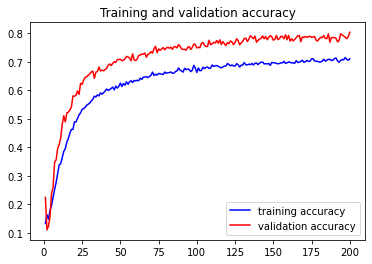

In [277]:
print(history.history.keys())

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label="training accuracy")
plt.plot(epochs, val_acc, 'r', label="validation accuracy")
plt.title('Training and validation accuracy')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

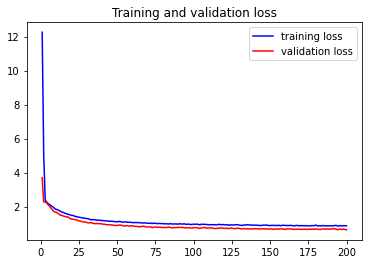

In [278]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'b', label="training loss")
plt.plot(epochs, val_loss, 'r', label="validation loss")
plt.title('Training and validation loss')
plt.legend()

plt.show

In [243]:
import glob
filename = glob.glob('/home/amiya/Desktop/Homework/Voice_Classification/UrbanSound8K/metadata/test/*.wav')
predict=[]
for file in filename:
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    #print(mfccs_scaled_features)
    #print(mfccs_scaled_features.shape)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    #print(mfccs_scaled_features)
    #print(mfccs_scaled_features.shape)
    predicted_label = model.predict_classes(mfccs_scaled_features)
    prediction_class = labelencoder.inverse_transform(predicted_label)
    for lab in predicted_label:
        predict.append(lab)
print(predict)

    

[3, 3, 3, 2, 9, 3, 2, 2, 4, 2, 2, 2, 9, 1, 2, 9, 3, 2, 3, 3]


In [244]:
test_df = pd.read_csv('/home/amiya/Desktop/Homework/Voice_Classification/UrbanSound8K/metadata/test.csv')


y_true = test_df['classID']
y_trues = np.array(y_true)
print(y_trues)
print(predict)

[3 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 3]
[3, 3, 3, 2, 9, 3, 2, 2, 4, 2, 2, 2, 9, 1, 2, 9, 3, 2, 3, 3]
